In [1]:
# Wie beim ersten Blatt müssen für dieses Blatt wieder Packages installiert werden
#!pip install igraph==0.9.8
#!apt install libcairo2-dev
#!pip install pycairo
#!pip install matplotlib

# Packages Laden

In [2]:
# Wie bereits im ersten Problem Set werden zunächst die notwendigen Packages importiert
from igraph import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Willkommen zum zweiten Python Problem Set in diesem Modul!  
Sie finden hier eine Aufgabe (*Exercise 5*) zu den Inhalten aus Kapitel 3 *Social Network Analysis* - konkret zu dem Teil 3.1.4.

# Aufgabe 5

In den folgenden beiden Aufgaben werden wir uns zwei Netzwerke genauer anschauen und sie auf verschiedene Eigenschaften untersuchen. Dabei liegt der Fokus der aktuellen Aufgabe auf den **grundlegenden Maßen**, die die Knoten und Kanten eines Netzwerks charakterisieren. In *Problem Set Nr.3* werden wir uns insbesondere den Zentralitätsmaßen in Netzwerken widmen.
Die zwei Netzwerke heißen *Karate* und *Kite*. Karate ist ein Netzwerk eines Karate Clubs, welches aus einer wissenschaftlichen Arbeit von Wayne W. Zachary stammt. Das Kite Netzwerk hingegen bildet optisch die Form eines Drachen (Fluggerät) ab und wurde von David Krackhardt erstellt.  

*Die folgende Aufgabe erfolgt in Anlehnung an Kolaczyk und Csárdi, Kapitel 4.2.1.* **(Noch relevant?)**

Laden Sie im folgenden Code-Chunk die zwei Netzwerke, die wir im Folgenden betrachten werden, indem Sie den Code ausführen. 

Es ist <ins>nicht</ins> notwendig, dass Sie sich den Code im Detail ansehen. 

### Aufgabe 5.1

In [3]:
# {"5_1"}
# Import des Karate Netzwerks
karate = pd.read_csv('https://raw.githubusercontent.com/larsmoe/SAPS-BSDA-Kurs/master/Problemsets%20Python/PS_Nr_2_Python/data/Karate/KARATE.csv', sep=";", header=None, names=['A','B'])
kite = pd.read_csv('https://raw.githubusercontent.com/larsmoe/SAPS-BSDA-Kurs/master/Problemsets%20Python/PS_Nr_2_Python/data/Kite/Kite.csv', sep=";", header=None, names=['A','B'])


# Der Subtract Befehl ist notwendig, um die Indices auf die Python Indexierung zu bringen. Sprich, aus Knoten 1 wird Knoten 0
karate = karate.subtract(1)
kite = kite.subtract(1)

In [4]:
# Diese Funktion erstellt aus den importierten Netzwerkdaten Kantenlisten, die mit igraph kompatibel sind
def create_edge_list(node_list1, node_list2):
    edge_list = []
    for node_1, node_2 in zip(node_list1, node_list2):
        edge = (node_1, node_2)
        edge_list.append(edge)
    return edge_list

In [5]:
# Die zuvor deklarierte Funktion wird nun verwendet
karate_edges = create_edge_list(karate['A'].to_list(), karate['B'].to_list())
kite_edges = create_edge_list(kite['A'].to_list(), kite['B'].to_list())

In [6]:
# Erzeugung des Karate Graphs
graph_karate = Graph(n=34, edges=karate_edges, directed=True)

# Erzeugung des Kite Graphs
graph_kite = Graph(n=10, edges=kite_edges, directed=False)

### Aufgabe 5.2

Führen Sie den Code aus

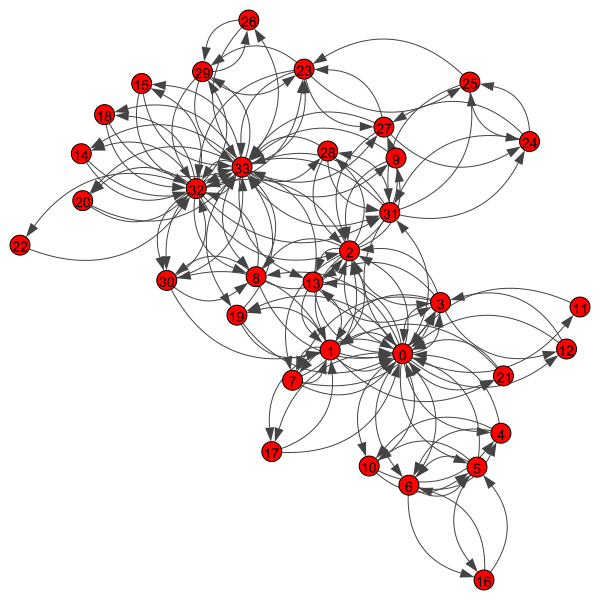

In [7]:
# {"5_2"}
#Plotten Sie den Graphen karate
plot(graph_karate, vertex_label=graph_karate.vs.indices)

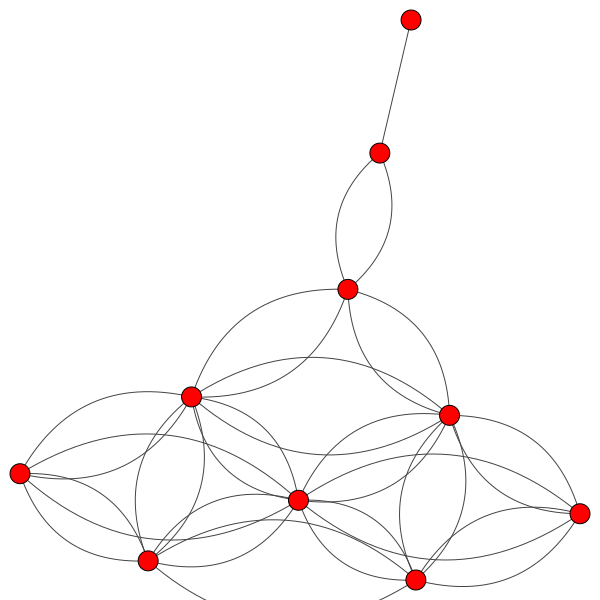

In [8]:
#Plotten Sie den Graphen Kite
plot(graph_kite)

Wie Sie sehen können, sind die zwei Netzwerke sehr unterschiedlich. Im Netzwerk *karate* (Zachary, 1977) stellen die Knoten Mitglieder eines Karateclubs dar und die Kanten Aktivitäten, welche die Mitglieder gemeinsam unternommen haben; Beim Netzwerk *kite* (Source "Kite" (2017); Krackhardt, 1990) handelt es sich um ein nichtreales soziales Netzwerk.

## a) Gradbasierte Maße - Node Degree und Degree Distribution

### Aufgabe 5.3

Wie Sie im Skript bereits gelernt haben, gibt der **Node Degree** (Grad) eines Knotens an, wie viele Kanten von ihm ausgehen. Bei gerichteten Graphen unterscheidet man zusätzlich zwischen **In-Degree** (Anzahl eingehender Kanten) und **Out-Degree** (Anzahl ausgehender Kanten).

Im Package *'igraph'* gibt der Befehl *graph.degree(vertices, mode)* den Node Degree derjenigen Knoten an, die in einem Vektor dem Argument *vertices* übergeben werden. Per default werden die Node Degrees aller Knoten ausgegeben. Bei gerichteten Graphen muss zusätzlich der Modus (*mode*) "*in*", "*out*" oder "*all*" festgelegt werden. Wie der Name sagt, erhält man beim *mode="in"* den In-Degree, beim *mode="out"* den Out-Degree und beim *mode="total"* die Summe aus In- und Out-Degree zurück. 
- - -
*Aufgabe:* Lassen Sie sich im folgenden Code-Chunk im (ungerichteten) Graphen *karate* den Node Degree vom Karate-Trainer "*Mr Hi*" und dem Präsidenten "*John A*" ausgeben.

**Hinweis:** Mr Hi ist Knoten 1 und John A ist Knoten 34. Erinnern Sie sich daran, dass in Python die Indexierung bei 0 beginnt und Sie von dem Werten also entsprechend 1 subtrahieren müssen. 
- - -

In [ ]:
# {"5_3"}
#Lassen Sie sich den Node Degree von "Mr Hi" und "John A" ausgeben
# Mr Hi ist Knoten 1 und John A ist Knoten 34


#### Tipps

##### Tipp 1

Geben Sie die Knoten innerhalb einer Liste an.
<br>
Beispiel: vertices=[10,25]

##### Lösung

graph_karate.degree(vertices=[0, 33], mode='all')

### Aufgabe 5.4

Bezogen auf das gesamte Netzwerk lässt sich der sogenannte **Average Degree** berechnen - der Durchschnitt der Node Degrees aller Knoten. Im Falle eines gerichteten Graphen ist auch hier zu unterscheiden zwischen dem **Average In-Degree** und dem **Average Out-Degree**. 
- - -
*Aufgabe:* Berechnen Sie für den Graphen *kite* und den Graphen *karate* jeweils den *Average Degree*. Beachten Sie, dass es hierfür keine separate Funktion gibt, sodass Sie tatsächlich den Mittelwert (*mean(x)*) der Node Degrees aller Knoten berechnen müssen. Folgen Sie den Angaben in den Kommentaren des nächsten Code-Chunks.
- - -

In [ ]:
# {"5_4"}
#Berechnen Sie die Node Degrees aller Knoten des Graphen kite und speichern Sie den Vektor in der Variable deg_kite

#Berechnen Sie nun den Average Degree des Graphen kite


#### Tipps

##### Tipp 1

Wenden Sie die Funktion graph.degree() ohne Angabe von Parametern an

##### Tipp 2

Verwenden Sie den Befehl mean(x) zur Berechnung des Mittelwerts von x

##### Lösung

Berechnen Sie die Node Degrees aller Knoten des Graphen kite und speichern Sie den Vektor in der Variable
<br>
<br>
*deg_kite
<br>
deg_kite = graph_kite.degree()*
<br>
<br>
Berechnen Sie nun den Average Degree des Graphen kite
<br>
<br>
*print(mean(deg_kite))*

### Aufgabe 5.5

Im Durchschnitt ist somit jeder Knoten des Graphen *kite* mit 3.6 Knoten **(Aktuell noch abweichend, da höhere Kantenzahl)** verbunden. Der folgende Code-Chunk berechnet dieselbe Kennzahl für das Netzwerk *karate*. Führen Sie den Code aus.

Wie Sie sehen werden, weichen die Graphen in dieser Kennzahl voneinander ab. Ist das alleine schon aussagekräftig?

In [ ]:
# {"5_5"}
#Berechnen Sie den Average Degree des Graphen karate
deg_karate = graph_karate.degree(mode='all')
print(mean(deg_karate))

### Aufgabe 5.6

Zur besseren Einschätzung und zum Vergleich der Graphen kann es nützlich sein, sich eine Gegenüberstellung der Kanten- und Knotenzahlen anzeigen zu lassen. 

- - -
*Aufgabe:* Lassen Sie sich dazu mit Hilfe der Befehle *graph.vcount()* und *graph.ecount()* die Anzahl der Knoten bzw. Kanten der beiden Graphen ausgeben.
- - -

In [ ]:
# {"5_6"}
#Bezüglich Graph kite:
#Speichern Sie die Anzahl Knoten in der Variable v_kite

#Speichern Sie die Anzahl Kanten in der Variable e_kite

#Bezüglich Graph karate:
#Speichern Sie die Anzahl Knoten in der Variable v_karate

#Speichern Sie die Anzahl Kanten in der Variable e_karate

#Übersichtliche Ausgabe der Zahlen
df_karate_kite = pd.DataFrame([[v_karate, e_karate], [v_kite, e_kite]], columns=['Knoten', 'Kanten'], index=['Karate', 'Kite'])
df_karate_kite

#### Tipps

##### Tipp 1

Verwenden Sie jeweil die Befehle graph.vcount() bzw. graph.ecount() um die Anzahl der Knoten bzw. Kanten zu erhalten. Geben Sie hierbei keine Parameter an

##### Lösung

Bezüglich Graph kite:
<br>Speichern Sie die Anzahl Knoten in der Variable v_kite
<br><br>*v_kite = graph_kite.vcount()*
<br><br>Speichern Sie die Anzahl Kanten in der Variable e_kite
<br><br>*e_kite = graph_kite.ecount()*
<br><br>Bezüglich Graph karate:
<br><br>Speichern Sie die Anzahl Knoten in der Variable v_karate
<br><br>*v_karate = graph_karate.vcount()*
<br><br>Speichern Sie die Anzahl Kanten in der Variable e_karate
<br><br>*e_karate = graph_karate.ecount()*
<br><br>Übersichtliche Ausgabe der Zahlen
<br><br>*df_karate_kite = pd.DataFrame([[v_karate, e_karate], [v_kite, e_kite]], columns=['Knoten', 'Kanten'], index=['Karate', 'Kite'])
<br>df_karate_kite*

### Aufgabe 5.7

Da der Graph *karate* sowohl in der Anzahl der Knoten, als auch in der Anzahl der Kanten größer ist als der Graph *kite*, besteht dennoch die Möglichkeit, dass die Graphen sich ähneln - obwohl der Average Degree unterschiedlich ausfällt. Untersuchen wir daher ein weiteres Merkmal - die **Degree Distribution**. Der Befehl *plt.hist(x, bins)* aus dem Package Matplotlib gibt ein Histogramm der Node Degrees aus. Das *x* steht hierbei für die zuvor berechneten Node Degrees. Die Node Degrees haben Sie bereits in Aufgabe 5.4 berechnet.
- - -
*Aufgabe:* Wenden Sie diesen Befehl im folgenden Code-Chunk auf die Node Degrees der einzelnen Knoten an, um dadurch die Degree Distribution zu erhalten.
- - -

In [ ]:
# {"5_7"}
#Lassen Sie sich die Degree Distribution des Graphen kite anzeigen
#Verwenden Sie dazu die oben definierte Variable deg_kite
plt.hist(_____, bins=np.arange(0, max(deg_kite)))

In [ ]:
#Lassen Sie sich zum Vergleich die Degree Distribution
#des Graphen karate anzeigen
#Verwenden Sie dazu die oben definierte Variable deg_karate
plt.hist(_____, bins=np.arange(0, max(deg_karate)))

#### Tipps

##### Tipp 1

Geben Sie einfach jeweils den Namen der Variablen, welche die Degrees beinhalten, anstelle der Platzhalter an

##### Lösung

plt.hist(deg_karate, bins=np.arange(0, max(deg_karate)))

#### Erklärung

Sie können erkennen, dass die beiden Graphen sich auch hinsichtlich der Degree Distribution $P(k)$ unterscheiden. Während die Node Degrees im Graph *kite* zwischen Node Degree=1 und Node Degree=6 eher gleichverteilt sind, ist die Degree Distribution des Graphen *karate* eher rechtsschief.

Die Berechnungen - Average In-Degree, Average Out-Degree und die Degree Distribution - für gerichtete Graphen erfolgen analog, mit dem Unterschied, dass bei der Funktion *degree* das Argument *mode="in"* bzw. *mode="out"* verwendet wird. Da dies keinen grundlegenden Lernfortschritt mit sich bringt, verzichten wir an dieser Stelle auf eine beispielhafte Berechnung für gerichtete Graphen.

## b) Gradbasierte Maße - Clustering Coefficient

Neben dem Node Degree haben Sie noch ein weiteres gradbasiertes Maß im Skript kennengelernt: den **Clustering Coefficient** für ungerichtete Graphen.

Im Package *'igraph'* gibt es den Befehl *transitivity*, welcher sowohl Local, als auch Average Clustering Coefficients für ungerichtete Graphen berechnen kann. Grundsätzlich sollte bei Clustering Coefficients stets darauf geachtet werden, wie sie berechnet werden. Um konsistent mit der Definition im Skript zu bleiben, werden wir daher lediglich den Local Clustering Coefficient $C_i$ mit dieser Formel berechnen:
$$C_i=\frac{2|L_i|}{k_i(k_i-1)}$$
Dabei steht $|L_i|$ für die Anzahl an Verbindungen zwischen den Nachbarknoten von Knoten i und $k_i$ für den Node Degree von Knoten i.  
Den globalen Clustering Coefficient, bei uns **Average Clustering Coefficient** $\langle C \rangle$ genannt, erhält man anschließend durch Mittelung der Local Clustering Coefficients:
$$\langle C \rangle = \frac{1}{|N|}\sum_{i=1}^{|N|}C_i$$
Hierbei steht $|N|$ wie gewohnt für die Anzahl aller Knoten im Graphen.

Im folgenden Code wird die Funktion *graph.transitivity_local_undirected(vertices, mode, weights)* verwendet, welche für bestimmte Knoten des Graphen *Karate* die Local Clustering Coefficients bestimmt (Kolaczyk und Csárdi, 2014, Kapitel 4.3.2) **(Quelle hier auch noch relevant?)**.

### Aufgabe 5.8

- - -
*Aufgabe:* Berechnen Sie nun analog dazu zunächst alle Local Clustering Coefficients für den Graphen *kite* und im Anschluss daran den Average Clustering Coefficient für diesen Graphen. Den Parameter *weights* benötigen Sie dazu nicht, da der Graph *kite* kein Kantenattribut namens *weight* besitzt. Wenn Sie den Parameter *vertices* nicht verwenden, so werden automatisch alle Knoten berücksichtigt. Auch über den Parameter *mode* müssen Sie sich keine Gedanken machen. Bei dieser Aufgabe reicht es aus, wenn Sie die Funktion ohne Parameter aufrufen.
- - -

In [ ]:
# {"5_8"}
#Berechnen Sie C_i für alle Knoten in kite
#und speichern Sie diese in C_local_kite

#Berechnen Sie den Average Clustering Coefficient, 
#indem Sie die Variable C_local_kite verwenden


#### Tipps

##### Tipp 1

Verwenden Sie den Befehl in der folgenden Form: graph.transitivity_local_undirected()

##### Tipp 2

Den Mittelwert bekommen Sie wie bereits zuvor über den Befehl mean(x)

##### Lösung

Berechnen Sie C_i für alle Knoten in kite
<br>und speichern Sie diese in C_local_kite
<br><br>*C_local_kite = graph_kite.transitivity_local_undirected()*
<br><br>Berechnen Sie den Average Clustering Coefficient, 
<br>indem Sie die Variable C_local_kite verwenden
<br><br>*print(mean(C_local_kite))*

#### Erklärung

Der Graph *kite* besitzt zwar keine isolierten Knoten, dafür aber einen Knoten mit nur einem Nachbar. Für den Fall, dass ein Knoten im betrachteten Graphen den Grad 0 (isolierter Knoten) oder 1 (ein Nachbarknoten) besitzt, ist die Formel für $C_i$ aus dem Skript für diesen Knoten nicht definiert. Auch mit dem oben verwendeten Befehl erhält man für einen solchen Knoten keinen Wert (*NaN*). Enstprechend ergibt sich für den Fall, dass der Graph mindestens einen solchen Knoten besitzt, auch kein Wert (*NaN*) für den Average Clustering Coefficient. Grundsätzlich erachten wir in solch einem Fall die Berechnung des Average Clustering Coefficients als nicht sinnvoll.

**Hinweis:** Die Funktion *graph.shortest_paths(weights)* liefert die kürzesten Entfernungen zwischen allen Knoten. 

## c) Pfadbasierte Maße

Sie haben in *Aufgabe 4* bereits verschiedene Befehle zur Bestimmung der Entfernung und des kürzesten Pfades zwischen Knoten  kennengelernt. Nun sollen diese beiden Maße durch den **Network Diameter** $d_{max}$ und die **Average Path Length** $\langle d \rangle$ erweitert werden. Auch diese beiden Kennzahlen betrachten wir im Folgenden lediglich für ungerichtete Graphen.

### Aufgabe 5.9

- - -
*Aufgabe:* Betrachten Sie den Graphen *karate* und bestimmen Sie den Network Diameter des Graphen analog zu seiner Definition
$$d_{max}=max_{n_i,n_j \in N}\{d(n_i,n_j)\}$$
Folgen Sie dazu den Anweisungen in den Kommentaren des folgenden Code-Chunks. Falls Sie sich an manche Befehle nicht mehr erinnern können, empfiehlt es sich, in *Aufgabe 4* nachzuschlagen.
- - -

In [ ]:
# {"5_9"}
#Bestimmen Sie die Entfernungen zwischen allen Knoten
#des Graphen karate und speichern Sie diese in der Variable dist_karate
#Setzen Sie das Argument weigths=None

#Führen Sie den folgenden Code aus, um das Maximum von dist_karate berechnen
#und in der Variable dmax_karate zu speichern
dmax_karate = max(np.array(dist_karate).reshape(-1))
#Lassen Sie dmax_karate ausgeben
#print(dmax_karate)
print(dmax_karate)

#### Tipps

##### Tipp 1

Verwenden Sie den Befehl *graph.shortest_paths(weights=None)* um die Entfernungen zu erhalten

##### Lösung

dist_karate = graph_karate.shortest_paths(weights=None)

### Aufgabe 5.10

Alternativ zu dieser manuellen Berechnung bietet das Package *'igraph'* den Befehl *graph.diameter(directed)*, welcher direkt den Network Diameter berechnet.
- - -
*Aufgabe:* Testen Sie im folgenden Code-Chunk, ob der Befehl (mit *directed=False*) für den Graphen *karate* zu demselben Ergebnis führt wie die manuelle Berechnung.
- - -

In [ ]:
# {"5_10"}
#Bestimmen Sie den Network Diameter von karate mit dem Befehl diameter


#### Tipps

##### Tipp 1

Wenden Sie den Befehl der Form *graph.diameter(directed=False)* an

##### Lösung

graph_karate.diameter(directed=False)

### Aufgabe 5.11

Abschließend soll die durchschnittliche Entfernung der Knoten zueinander (**Average Path Length** $\langle d \rangle$) bestimmt werden. Auch hier ist der intuitive Ansatz die manuelle Berechnung. Die Formel zur Berechnung lautet wie folgt:
$$\langle d \rangle = \frac{1}{|N|}\frac{1}{|N|-1}\sum_{i=1}^{|N|}\sum_{j=1,~j\neq i}^{|N|} d(n_i, n_j)$$
Anschaulich beschreibt die Doppelsumme die Addition aller Elemente der Entfernungsmatrix ohne die Diagonalelemente. 


- - -
*Aufgabe:* Wenden Sie den Befehl *graph.average_path_length()* auf den Graphen *karate* an um die Average Path Length zu berechnen. Hier wird mittels eines Breadth-First-Algorithmus die Average Path Length bestimmt.
- - -

In [ ]:
# {"5_11"}
#Bestimmen Sie die Average Path Length von karate direkt


#### Tipps

##### Tipp 1

Wenden Sie den Befehl in der Form *graph.average_path_length()* an

##### Lösung

print(graph_karate.average_path_length())